# EDA - Countrywise Tourist Revenue

Plotly based Exploratory Data Analysis on foregin tourism from 1960 to 2020

### The Dataset(s)
> **World Bank**
  
- [International Arrival](https://data.worldbank.org/indicator/ST.INT.ARVL) : tourist arrivals by country 
- [International Spending](https://data.worldbank.org/indicator/ST.INT.RCPT.CD) : tourist expenditures by country

> **Wikipedia**
 
- [Country Codes](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes) : Countrywise codes and XX

## Imports

In [1]:

import os
import pandas as pd
from itertools import cycle

import plotly.express as px

# set plotly as default pandas plotting backend
pd.options.plotting.backend = "plotly"

# set plotly color palette
palette = cycle(['#2a9d8f', '#e9c46a', '#f4a261', '#e76f51'])

## Preprocessing

In [2]:
arrivals = pd.read_csv(os.path.join('data', 'API_ST.INT.ARVL_DS2_en_csv_v2_3731977.csv'), skiprows=4)

spending = pd.read_csv(os.path.join('data', 'API_ST.INT.RCPT.CD_DS2_en_csv_v2_3733198.csv'), skiprows=4)

country_codes = pd.read_csv(os.path.join('data', 'Country_Codes.csv'))


In [3]:
print(f"""
Arrivals df shape: {arrivals.shape}
Spending df shape: {spending.shape}
Country Codes df shape: {country_codes.shape}
""")


Arrivals df shape: (266, 66)
Spending df shape: (266, 66)
Country Codes df shape: (249, 4)



In [4]:
arrivals.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1.481000e+06,1.667000e+06,1.739000e+06,1.832000e+06,1.758000e+06,1.863000e+06,1.897000e+06,1.951000e+06,NaN,NaN
1,Africa Eastern and Southern,AFE,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,3.274855e+07,3.442663e+07,3.573839e+07,3.531868e+07,3.764589e+07,3.825835e+07,4.118915e+07,3.982670e+07,NaN,NaN
2,Afghanistan,AFG,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,1.022103e+07,1.008582e+07,1.054462e+07,1.331168e+07,1.315078e+07,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"International tourism, number of arrivals",ST.INT.ARVL,NaN,NaN,NaN,NaN,NaN,NaN,...,5.280000e+05,6.500000e+05,5.950000e+05,5.920000e+05,3.970000e+05,2.610000e+05,2.180000e+05,2.180000e+05,NaN,NaN


In [5]:
# arrivals = arrivals.set_index('Country Name')
# spending = spending.set_index('Country Name')


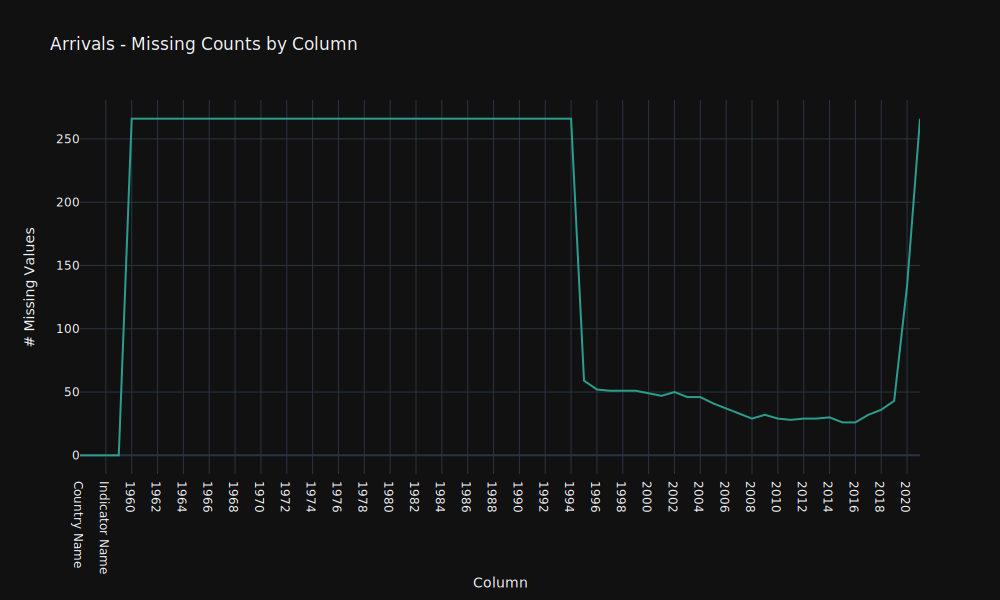

In [6]:
# analyze missing values

fig = px.line(
    title = 'Arrivals - Missing Counts by Column',
    y = arrivals.isna().sum().values,
    x = arrivals.isna().sum().keys(),
    labels = {
        'x': 'Column',
        'y': '# Missing Values',
    },
    height = 600, width = 1000,
    template = 'plotly_dark',
    color_discrete_sequence = [f'{next(palette)}']
)

fig.show('svg')

All data forom 1960 to 1994 is missing - we will drop these columns

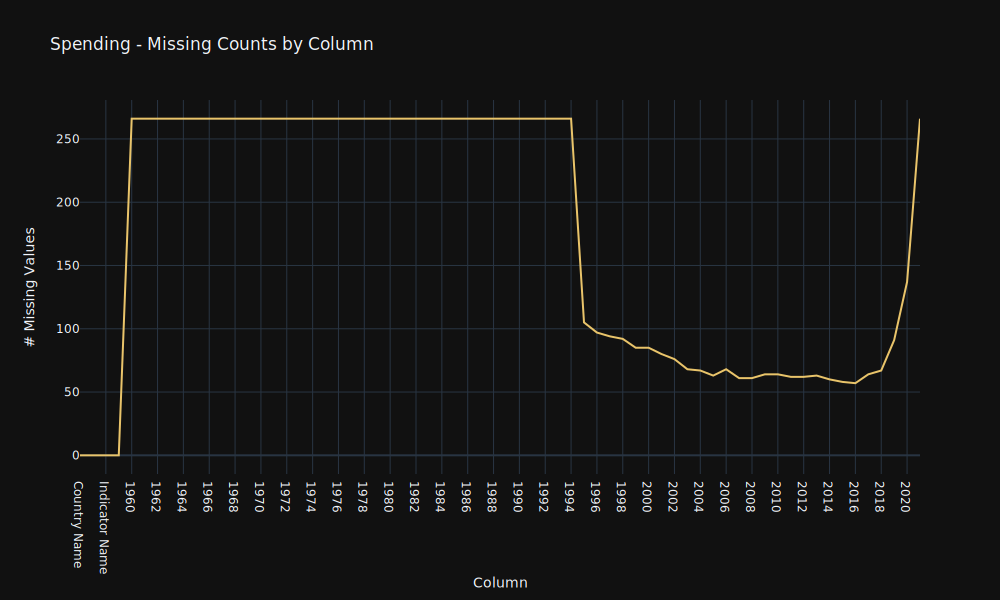

In [7]:
# analyze missing values

fig = px.line(
    title = 'Spending - Missing Counts by Column',
    y = spending.isna().sum().values,
    x = spending.isna().sum().keys(),
    labels = {
        'x': 'Column',
        'y': '# Missing Values',
    },
    height = 600, width = 1000,
    template = 'plotly_dark',
    color_discrete_sequence = [f'{next(palette)}']
)

fig.show('svg')

Same goes for the spending df - we will drop data from 1960-1994. This dataframe has more missing values from 1995 to 2020 compared to the arrivals dataframe

In [8]:
# Drop missing values
cols_to_drop = ['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', 
       'Indicator Name', 'Indicator Code', 'Unnamed: 65']

arrivals.drop(cols_to_drop, axis=1, inplace=True)
spending.drop(cols_to_drop, axis=1, inplace=True)

In [9]:
# Compare dataset countries against a list of countries on Earth

differences = set(arrivals['Country Code']) - set(country_codes['ISO3'])
print(len(differences))

51


We have 51 "countries" that aren't actually countries... Lets see what these places are

In [10]:
not_countries = arrivals[arrivals['Country Code'].isin(list(differences))]
not_countries['Country Name'][:15]

1                       Africa Eastern and Southern
3                        Africa Western and Central
7                                        Arab World
36                   Central Europe and the Baltics
38                                  Channel Islands
49                           Caribbean small states
61      East Asia & Pacific (excluding high income)
62                       Early-demographic dividend
63                              East Asia & Pacific
64    Europe & Central Asia (excluding high income)
65                            Europe & Central Asia
68                                        Euro area
73                                   European Union
74         Fragile and conflict affected situations
95                                      High income
Name: Country Name, dtype: object

It seems as though they are names for certain groups of countries. We will drop these "countries."

In [11]:
arrivals = arrivals[~arrivals['Country Code'].isin(list(differences))]
spending = spending[~spending['Country Code'].isin(list(differences))]

In [12]:
# Reset Indexes to be continuous

arrivals = arrivals.reset_index().drop(['index'], axis=1)
spending = spending.reset_index().drop(['index'], axis=1)

With that, we are done preprocessing the data for EDA

## EDA

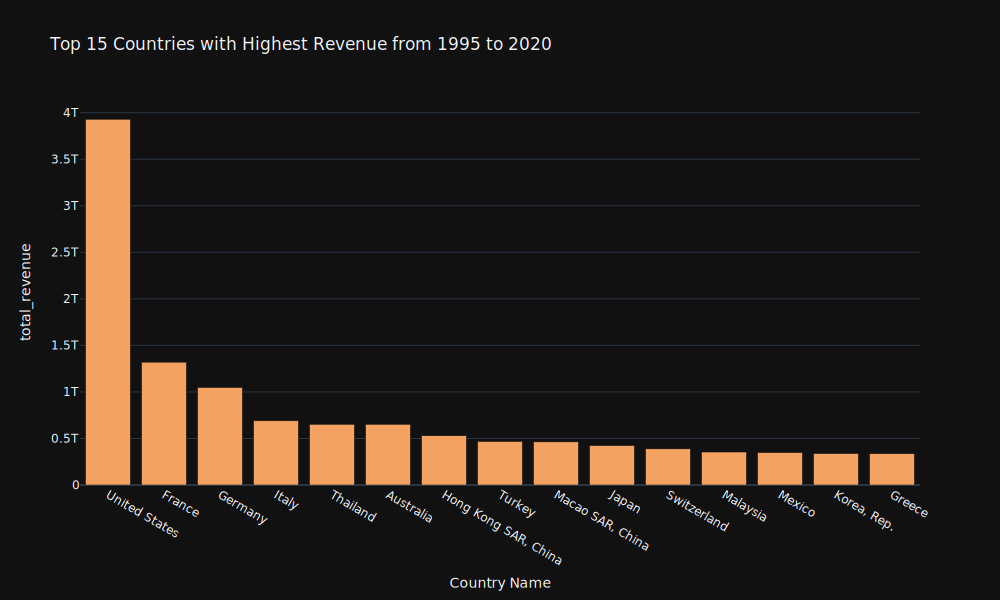

In [13]:
# Let's see how much each country has earned in total over the years

df = spending.drop(['Country Name', 'Country Code'], axis=1).T
total_spending_by_country = [df[x].sum() for x in df.columns]

spending['total_revenue'] = total_spending_by_country

fig = px.bar(
    spending.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)[:15],
    x = 'Country Name',
    y = 'total_revenue',
    hover_name = 'Country Code',
    template = 'plotly_dark',
    height = 600, width = 1000,
    color_discrete_sequence = [f'{next(palette)}'],
    title = 'Top 15 Countries with Highest Revenue from 1995 to 2020'
    )
    

fig.show('svg')

The US is far ahead of other countries in terms of money that tourists spend. 

It shouldn't be a surprise if the arrivals graph looks just the same. 

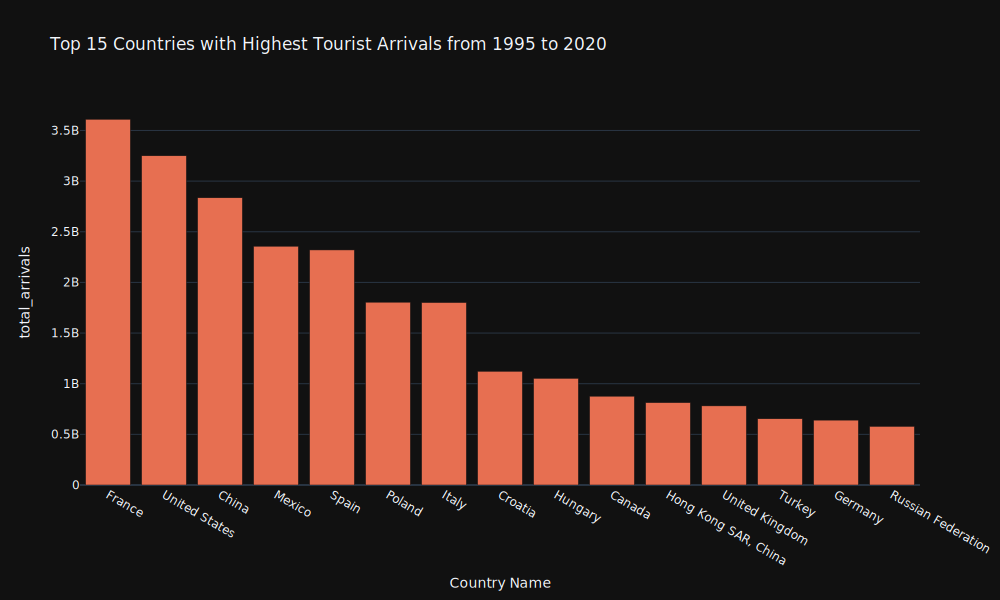

In [14]:
# Let's see how many arrivals each country has earned in total over the years

df = arrivals.drop(['Country Name', 'Country Code'], axis=1).T
total_arrivals_by_country = [df[x].sum() for x in df.columns]

arrivals['total_arrivals'] = total_arrivals_by_country

fig = px.bar(
    arrivals.sort_values(by='total_arrivals', ascending=False).reset_index(drop=True)[:15],
    x = 'Country Name',
    y = 'total_arrivals',
    hover_name = 'Country Code',
    template = 'plotly_dark',
    height = 600, width = 1000,
    color_discrete_sequence = [f'{next(palette)}'],
    title = 'Top 15 Countries with Highest Tourist Arrivals from 1995 to 2020'
)

fig.show('svg')

*Never mind.* Looks like France takes the lead with the US right on its tail. But its quite surprising to see such a huge gap in revenue despite the number of tourists being relatively close. 

What's even more suprising is that Thailand is nowhere in the top 15 in terms of arrivals, but is ranked 5th in terms of revenue. 

Let's see a comparison of the trends for the top 5 countries - once for arrivals, and once for spending

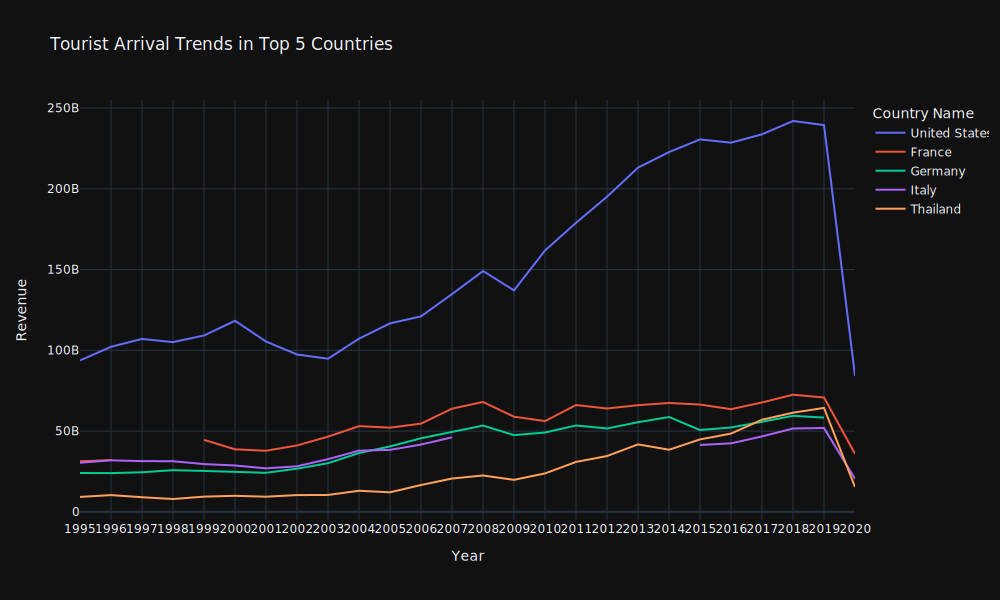

In [15]:
df = spending.sort_values(by='total_revenue', ascending=False).reset_index(drop=True)[:5]
df = df.set_index(df['Country Name']).drop(['Country Name', 'Country Code', 'total_revenue'], axis=1).T

fig = px.line(
    df, y = df.columns, template = 'plotly_dark',
    height = 600, width = 1000, 
    title = "Tourist Arrival Trends in Top 5 Countries"
)

fig.update_xaxes(title='Year')
fig.update_yaxes(title='Revenue')
fig.show('svg')

Seems like the pandemic hit hard. 

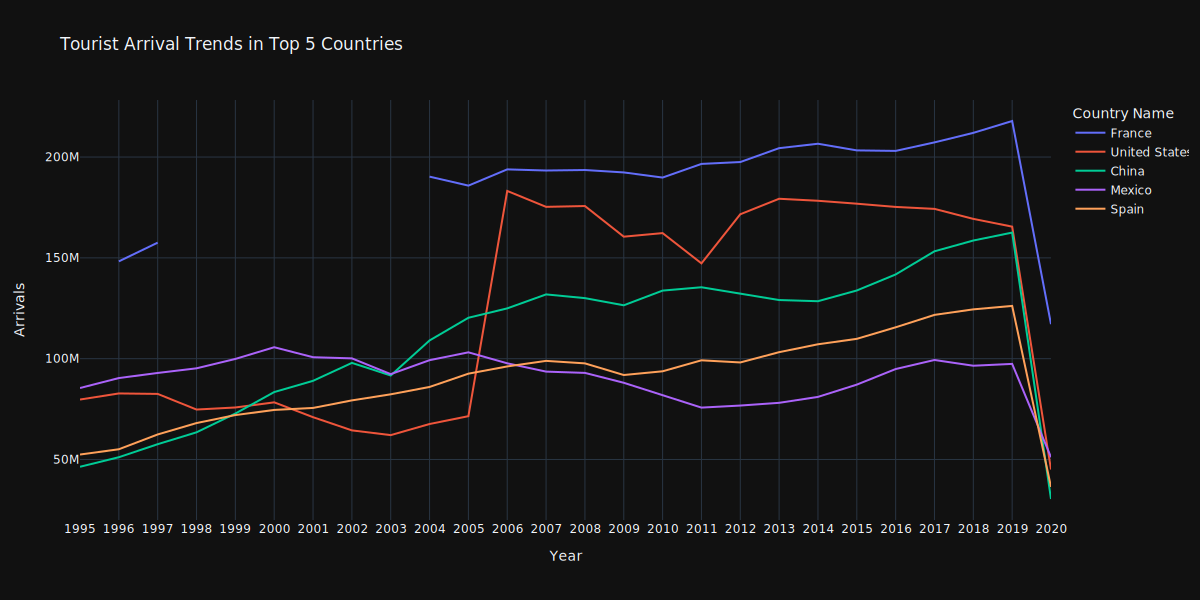

In [16]:
df = arrivals.sort_values(by='total_arrivals', ascending=False).reset_index(drop=True)[:5]
df = df.set_index(df['Country Name']).drop(['Country Name', 'Country Code', 'total_arrivals'], axis=1).T

fig = px.line(
    df, y = df.columns, template = 'plotly_dark',
    height = 600, width = 1200, 
    title = "Tourist Arrival Trends in Top 5 Countries"
)

fig.update_xaxes(title='Year')
fig.update_yaxes(title='Arrivals')
fig.show('svg')
